# **🔎 The Digital Toolbox (Libraries)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.ticker as ticker
import plotly.graph_objects as go

# **📂 Gathering the Evidence (Loading Data)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci (2).csv


In [ ]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **🧹 Scrubbing the Crime Scene (Cleaning)**

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
del df['restecg']
del df['thal']
del df['oldpeak']
del df['slope']
del df['exang']

In [ ]:
df = df.rename(columns={'trestbps': 'bld pres', 'fbs': 'bld sug', 'dataset' : 'cntry' , 'cp' : 'pain typ' , 'thalch' : 'mx hrt rate', 'ca': 'artry blok cnt'})
df.head()

,id,age,sex,cntry,pain typ,bld pres,chol,bld sug,mx hrt rate,artry blok cnt,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,150.0,0.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,108.0,3.0,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,129.0,2.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,187.0,0.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,172.0,0.0,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
cntry,0
pain typ,0
bld pres,59
chol,30
bld sug,90
mx hrt rate,55
artry blok cnt,611


In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
id,0
age,0
sex,0
cntry,0
pain typ,0
bld pres,0
chol,0
bld sug,0
mx hrt rate,0
artry blok cnt,0


In [ ]:
df.shape

(303, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 759
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              303 non-null    int64  
 1   age             303 non-null    int64  
 2   sex             303 non-null    object 
 3   cntry           303 non-null    object 
 4   pain typ        303 non-null    object 
 5   bld pres        303 non-null    float64
 6   chol            303 non-null    float64
 7   bld sug         303 non-null    object 
 8   mx hrt rate     303 non-null    float64
 9   artry blok cnt  303 non-null    float64
 10  num             303 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 28.4+ KB


all types are correct except bld sug, should be a bool

In [ ]:
df['sex'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
df['pain typ'].unique()


array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [ ]:
df['bld sug'].unique()

array([True, False], dtype=object)

In [ ]:
df['bld sug'] = df['bld sug'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 759
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              303 non-null    int64  
 1   age             303 non-null    int64  
 2   sex             303 non-null    object 
 3   cntry           303 non-null    object 
 4   pain typ        303 non-null    object 
 5   bld pres        303 non-null    float64
 6   chol            303 non-null    float64
 7   bld sug         303 non-null    bool   
 8   mx hrt rate     303 non-null    float64
 9   artry blok cnt  303 non-null    float64
 10  num             303 non-null    int64  
dtypes: bool(1), float64(4), int64(3), object(3)
memory usage: 26.3+ KB


In [ ]:
df['bld sug'].unique()

array([ True, False])

 shuffle the dataset in order to have a distribution when we splitting during train and test dataset.

In [ ]:
df = shuffle(df)

In [ ]:
df.head()

,id,age,sex,cntry,pain typ,bld pres,chol,bld sug,mx hrt rate,artry blok cnt,num
119,120,65,Male,Cleveland,asymptomatic,135.0,254.0,False,127.0,1.0,2
184,185,60,Female,Cleveland,asymptomatic,158.0,305.0,False,161.0,0.0,1
223,224,53,Male,Cleveland,asymptomatic,123.0,282.0,False,95.0,2.0,3
257,258,76,Female,Cleveland,non-anginal,140.0,197.0,False,116.0,0.0,0
191,192,51,Male,Cleveland,asymptomatic,140.0,298.0,False,122.0,3.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 119 to 136
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              303 non-null    int64  
 1   age             303 non-null    int64  
 2   sex             303 non-null    object 
 3   cntry           303 non-null    object 
 4   pain typ        303 non-null    object 
 5   bld pres        303 non-null    float64
 6   chol            303 non-null    float64
 7   bld sug         303 non-null    bool   
 8   mx hrt rate     303 non-null    float64
 9   artry blok cnt  303 non-null    float64
 10  num             303 non-null    int64  
dtypes: bool(1), float64(4), int64(3), object(3)
memory usage: 26.3+ KB


# **🖼️ Plotting the Evidence (Visuals)**


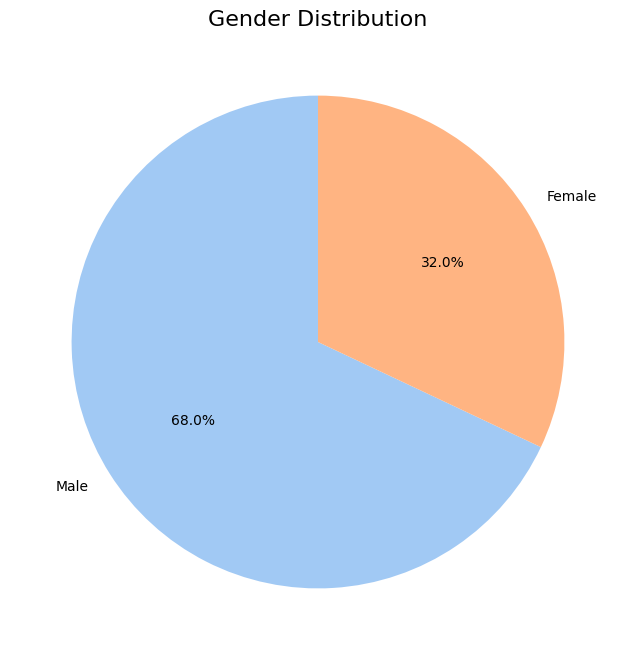

In [ ]:
plt.figure(figsize=(8, 8))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution', fontsize=16  )
plt.show()

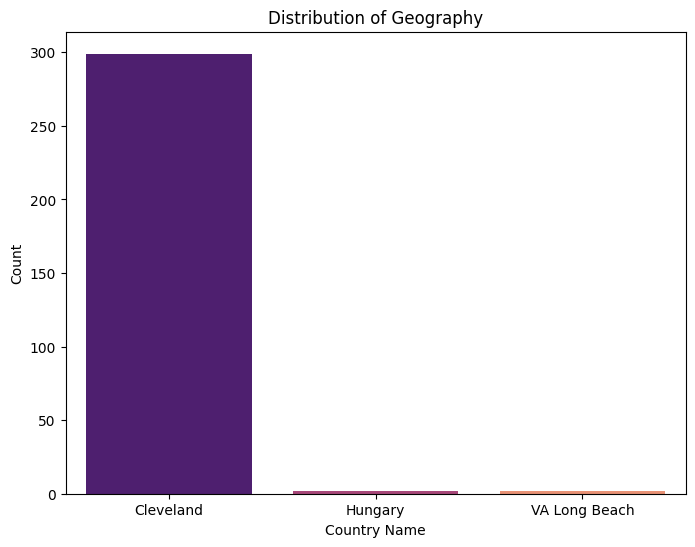

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cntry', data=df, palette='magma', order=df['cntry'].value_counts().index)
plt.title('Distribution of Geography')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.show()

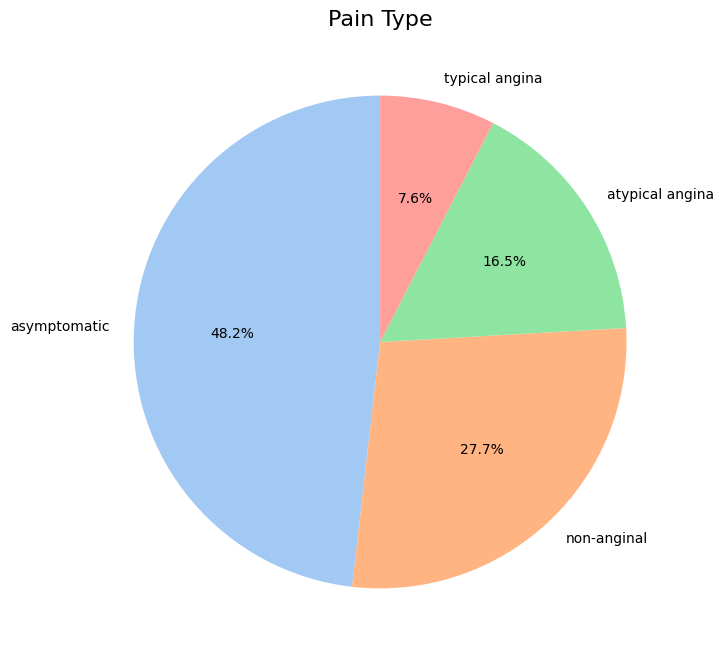

In [ ]:
plt.figure(figsize=(8, 8))
gender_counts = df['pain typ'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pain Type', fontsize=16  )
plt.show()

# **🕵️‍♂️ Case File: The Heart Disease Mystery**

A murder had occurred—labeled mysteriously as 'num'. The FBI was called in, but this wasn’t an ordinary crime. The evidence came not from a crime scene, but from 920 rows of medical data.

The detectives pulled surveillance footage—the dataset. They eliminated noise: restecg, thal, oldpeak, slope, and exang. Only the most telling features would remain. That’s when Detective Data took over.

## **🔍 Clue #1: Artery Block Count**

In [ ]:
# Chi-squared test of independence between 'ca' and 'num'
contingency_table = pd.crosstab(df['artry blok cnt'], df['num'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: There is a significant association between 'artery block count' and heart disease severity.")
else:
    print("Fail to Reject H₀: No significant association between 'artery block count' and heart disease severity.")


Chi-squared Statistic: 110.86208117752817
P-value: 4.040413226946588e-18
Reject H₀: There is a significant association between 'ca' and heart disease severity.


Detective Data dove into the heart of the mystery, scanning 920 patient files. One clue stood out: artery block count. Was there a connection between the number of blocked arteries and heart disease severity?

The chi-squared test delivered a crushing verdict: Chi² = 110.86, p < 4.04e-18.

“There’s no doubt,” the detective muttered. “Significant association.”

The narrowing wasn’t just in arteries—it helped narrow the case

## **🧪 Clue #2: Cholesterol – A Case of Circumstantial Evidence**

In [ ]:
# Cholesterol levels in both groups
diseased_chol = df[df['num'] > 0]['chol'].dropna()
non_diseased_chol = df[df['num'] == 0]['chol'].dropna()

# Means and standard errors
mean_diseased = diseased_chol.mean()
mean_non_diseased = non_diseased_chol.mean()
std_diseased = diseased_chol.std(ddof=1)
std_non_diseased = non_diseased_chol.std(ddof=1)
n_diseased = len(diseased_chol)
n_non_diseased = len(non_diseased_chol)

# Standard error of difference
se_diff = np.sqrt((std_diseased**2 / n_diseased) + (std_non_diseased**2 / n_non_diseased))

# Confidence interval
df_deg = ((std_diseased**2 / n_diseased + std_non_diseased**2 / n_non_diseased)**2 /
         ((std_diseased**2 / n_diseased)**2 / (n_diseased - 1) +
          (std_non_diseased**2 / n_non_diseased)**2 / (n_non_diseased - 1)))
t_crit = stats.t.ppf(0.975, df=df_deg)

margin = t_crit * se_diff
ci_low = (mean_non_diseased - mean_diseased) - margin
ci_high = (mean_non_diseased - mean_diseased) + margin

print(f"Mean Chol (Diseased): {mean_diseased:.2f}")
print(f"Mean Chol (Non-diseased): {mean_non_diseased:.2f}")
print(f"95% CI for difference in means: ({ci_low:.2f}, {ci_high:.2f})")


Mean Chol (Diseased): 250.24
Mean Chol (Non-diseased): 241.37
95% CI for difference in means: (-21.07, 3.32)


The next suspect: cholesterol. On average, diseased patients had higher levels (250.24 vs 241.37). But the confidence interval for the difference spanned -21.07 to 3.32—crossing zero.

Statistically, it was inconclusive.

“Cholesterol might be involved,” the detective noted, “but the case won’t hold up in court.”

For now, cholesterol walked free. But the detective would keep a watchful eye.

## **📉 Clue #3: Blood Pressure—A Misleading Tip?**

An anonymous tip accused blood pressure of being the killer. Box plots and a t-test followed. The results?

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['bld pres'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=df[df['num']== 0]['bld pres'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df['num'] !=0]['bld pres'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

It seems a bit vague, maybe check with a hypothesis test

In [ ]:
diseased_bp = df[df["num"] > 0]["bld pres"].dropna()
non_diseased_bp = df[df["num"] == 0]["bld pres"].dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(diseased_bp, non_diseased_bp, equal_var=False)

print(f"T-Test Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: Resting blood pressure differs significantly between diseased and non-diseased patients.")
else:
    print("Fail to Reject H₀: No significant difference in resting blood pressure between the two groups.")

T-Test Statistic: 2.6122, P-Value: 0.0095
Reject H₀: Resting blood pressure differs significantly between diseased and non-diseased patients.


## **🔥 Heatmap of Suspects**

The anonymous tip about "bld pres" wasn’t entirely wrong—it is involved, as the hypothesis test confirmed a significant difference between groups. However, it’s not the primary killer. Detective created correlation heatmap for a bigger picture.

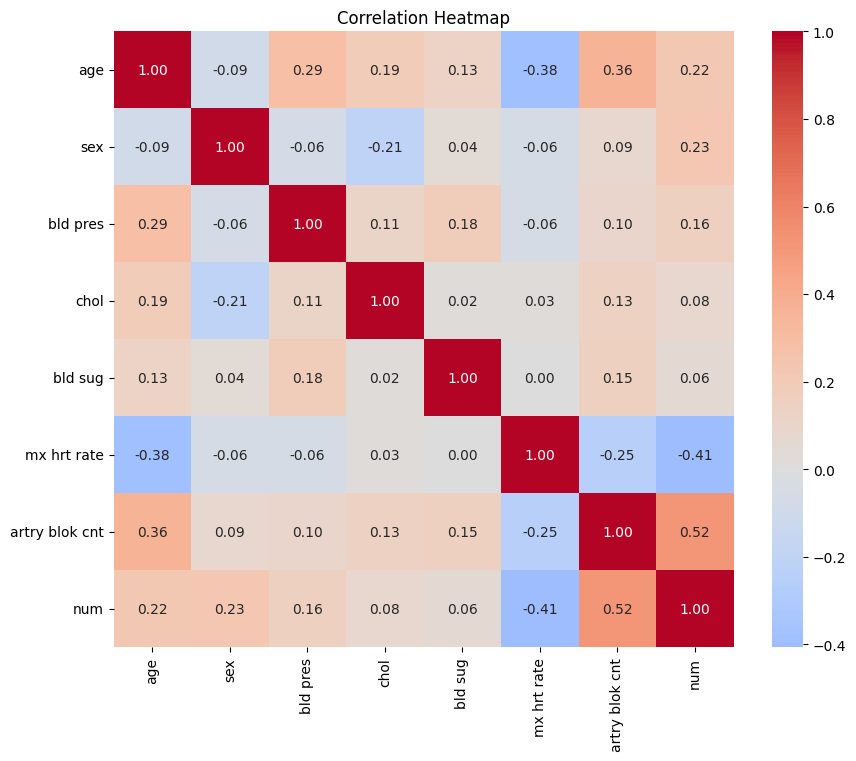

In [ ]:
df_numeric = df.copy()
df_numeric['sex'] = df_numeric['sex'].map({'Male': 1, 'Female': 0})
df_numeric['bld sug'] = df_numeric['bld sug'].astype(int)

# drop categorical columns
df_numeric = df_numeric.drop(['id', 'cntry', 'pain typ'], axis=1)

corr = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

It seems like blood sugar is not the prime suspect; however not fully innocent. After seeing the heatmap, the prime suspects now are age, max heart rate, and sex since they have the highest correlation with num (target [0=no heart disease; 1,2,3,4 = stages of heart disease ]). The detective now shifts focus, as age and max heart rate stood out. They were next in line for interrogation.

## **🎯 Clue #4: Age**

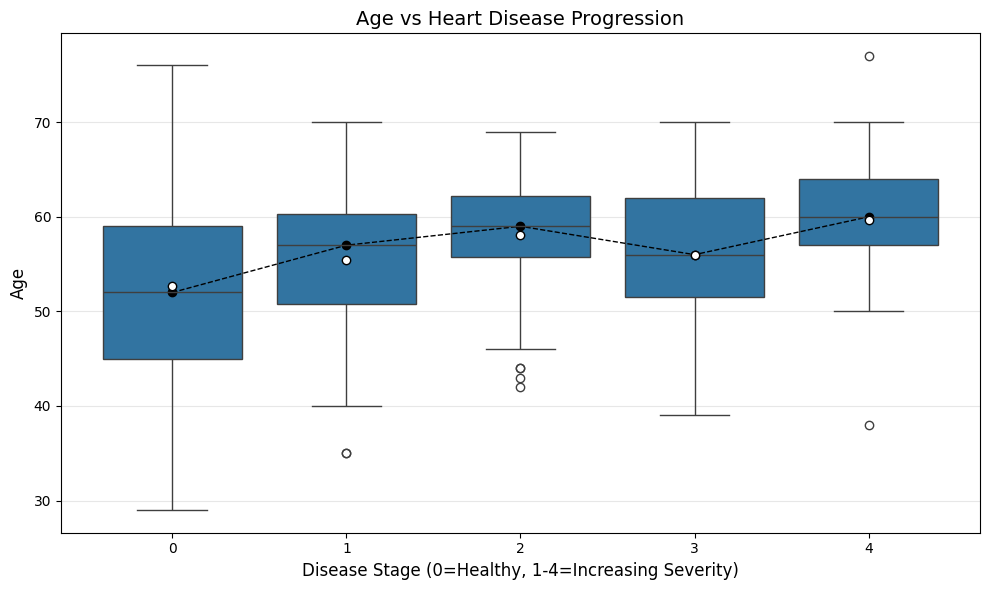

In [ ]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='num', y='age', data=df,
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

# Add trend line for median ages
medians = df.groupby('num')['age'].median()
plt.plot(medians.index, medians.values, color='black', linestyle='--', linewidth=1, marker='o')

plt.title('Age vs Heart Disease Progression', fontsize=14)
plt.xlabel('Disease Stage (0=Healthy, 1-4=Increasing Severity)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df[df['num']== 0]['age'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=df[df['num'] ==4]['age'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Age Distribution', yaxis_title = 'Age', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

The wide part in heart disease part makes age very suspicious, maybe a lie detector machine (Hypothsis test) to futher know

In [ ]:
# Split data into diseased (num > 0) and non-diseased (num = 0)
diseased = df[df['num'] > 0]['age']
non_diseased = df[df['num'] == 0]['age']

# Perform one-tailed t-test (checking for higher age in diseased)
t_stat, p_value = stats.ttest_ind(diseased.dropna(), non_diseased.dropna(), equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results (95% confidence level)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Age is significantly higher in patients with heart disease.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that age is higher in diseased patients.")

T-statistic: 3.994851786455639
P-value: 4.073231801802505e-05
Reject the null hypothesis: Age is significantly higher in patients with heart disease.


When the detective zeroed in on "age" as an accomplice, its 0.35 correlation with "num" raising alarms. The anonymous tip about "bld pres" had been a false lead given to us by the guilty 'age'. Running a t-test, the detective split the data into diseased (num > 0) and non-diseased (num = 0) groups, testing if age was higher in the afflicted. The result hit hard: T-statistic 8.18, p-value 6.139499693255652e-16— well below 0.05. "Reject the null hypothesis: Age is significantly higher in patients with heart disease," the screen declared. Age, the silent accomplice, was now caught red-handed.

## **❤️ Clue #5: Max Heart Rate**

The (-0.36) correlation of "mx hrt rate" hinted at an accomplice still at large.

In [ ]:
# Split data into diseased (num > 0) and non-diseased (num = 0)
diseased = df[df['num'] > 0]['mx hrt rate'].dropna()
non_diseased = df[df['num'] == 0]['mx hrt rate'].dropna()

# Calculate means and standard errors
mean_diseased = np.mean(diseased)
mean_non_diseased = np.mean(non_diseased)
std_diseased = np.std(diseased, ddof=1)
std_non_diseased = np.std(non_diseased, ddof=1)
n_diseased = len(diseased)
n_non_diseased = len(non_diseased)

# Standard error of the difference
se_diff = np.sqrt((std_diseased**2 / n_diseased) + (std_non_diseased**2 / n_non_diseased))

# 95% confidence interval using t-distribution (degrees of freedom approximated with Welch's method)
degrees_of_freedom = ((std_diseased**2 / n_diseased + std_non_diseased**2 / n_non_diseased)**2 /
                     ((std_diseased**2 / n_diseased)**2 / (n_diseased - 1) +
                      (std_non_diseased**2 / n_non_diseased)**2 / (n_non_diseased - 1)))
t_critical = stats.t.ppf(0.975, df=degrees_of_freedom)

# Confidence interval
margin_of_error = t_critical * se_diff
ci_lower = (mean_non_diseased - mean_diseased) - margin_of_error
ci_upper = (mean_non_diseased - mean_diseased) + margin_of_error

print(f"Mean mx hrt rate (diseased): {mean_diseased:.2f}")
print(f"Mean mx hrt rate (non-diseased): {mean_non_diseased:.2f}")
print(f"95% Confidence Interval for difference in means: ({ci_lower:.2f}, {ci_upper:.2f})")

Mean mx hrt rate (diseased): 138.80
Mean mx hrt rate (non-diseased): 158.15
95% Confidence Interval for difference in means: (14.53, 24.18)


The analysis showed a mean maximum heart rate of 138.80 for diseased patients and 158.15 for non-diseased, with a 95% confidence interval ranging from 14.53 to 24.18—clearly above zero.

“That’s no coincidence,” the detective said. “This heart rate isn’t just low—it’s guilty.”

Age was caught red-handed, and now max heart rate was exposed as its silent accomplice.

## **Machine Learning Modeling and Evaluation**

# **🧠 Epilogue: Machine Learning Takes Over**

The detectives handed over the suspects to a machine learning interrogation system. Logistic regression, decision trees, random forests, and support vector machines were trained on the data.

In [ ]:
df['disease'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df_ml = pd.get_dummies(df, columns=['sex', 'pain typ', 'cntry'], drop_first=True)
X = df_ml.drop(['id', 'num', 'disease'], axis=1)
y = df_ml['disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

In [ ]:
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"🎯 Precision: {precision_score(y_test, y_pred):.2f}")
print(f"🎯 Recall: {recall_score(y_test, y_pred):.2f}")
print(f"🎯 F1 Score: {f1_score(y_test, y_pred):.2f}")

🔍 Confusion Matrix:
 [[25  5]
 [ 8 23]]

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.82      0.74      0.78        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

✅ Accuracy: 0.79
🎯 Precision: 0.82
🎯 Recall: 0.74
🎯 F1 Score: 0.78


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_reg = lin_reg.predict(X_test)

In [ ]:
print("\n📉 Linear Regression Fit Quality:")
print(f"R² Score: {r2_score(y_test, y_pred_reg):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_reg):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_reg):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_reg)):.2f}")



📉 Linear Regression Fit Quality:
R² Score: 0.39
MAE: 0.31
MSE: 0.15
RMSE: 0.39


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

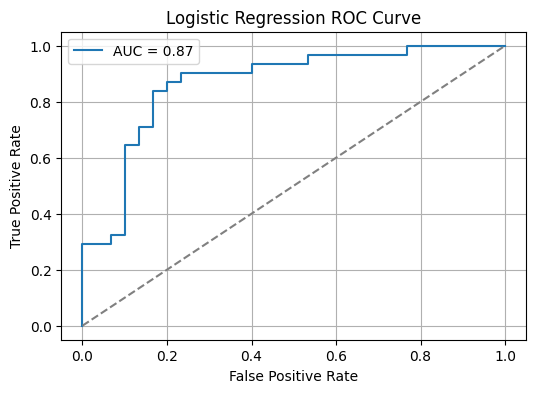

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cv_acc = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
print(f"📌 Cross-Validated Accuracy: {cv_acc.mean():.2f} ± {cv_acc.std():.2f}")

📌 Cross-Validated Accuracy: 0.79 ± 0.05


In [ ]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 10, None]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

best_models = {}

In [ ]:
for name, config in models.items():
    print(f"🔍 Tuning {name}...")
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"✅ Best Params for {name}: {grid.best_params_}")
    y_pred = grid.predict(X_test)
    print(f"📊 {name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

🔍 Tuning LogisticRegression...
✅ Best Params for LogisticRegression: {'C': 1}
📊 LogisticRegression Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.82      0.74      0.78        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

🔍 Tuning DecisionTree...
✅ Best Params for DecisionTree: {'max_depth': 5, 'min_samples_split': 5}
📊 DecisionTree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.79      0.71      0.75        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

🔍 Tuning RandomForest...
✅ Best Params for RandomForest: {'max_depth': 10, 'n_estimators': 50}
📊 RandomF

In [ ]:
joblib.dump(best_models['LogisticRegression'], 'logistic_model.pkl')
print("📁 Model saved as 'logistic_model.pkl'")

📁 Model saved as 'logistic_model.pkl'


In [ ]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

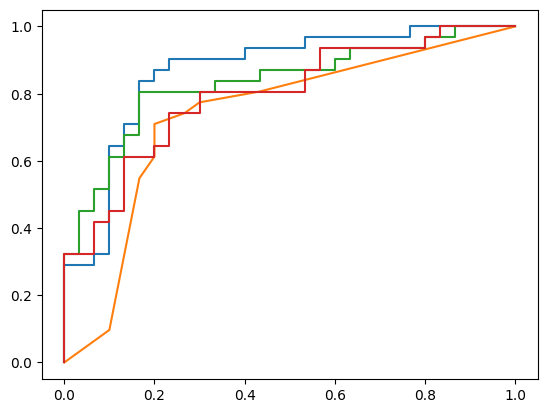

In [ ]:
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} AUC = {auc:.2f}')

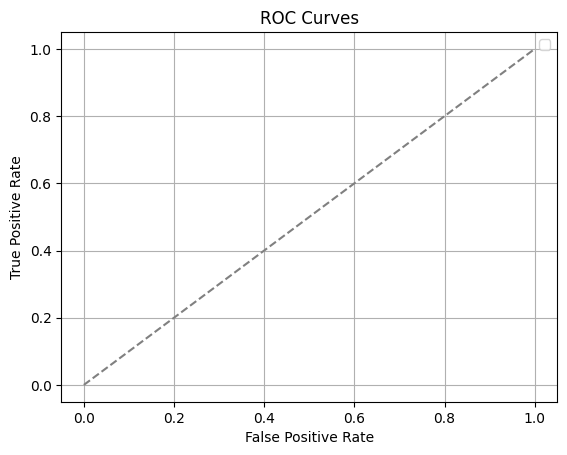

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

The investigation was long. The leads were misleading.
But in the end, age and max heart rate cracked the case.

Heart disease had nowhere left to hide.